# Day 1
### Data Cleaning and preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#reading data
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")
# Concatenate df1 and df2
df = pd.concat([df1, df2], ignore_index=True)

# Display the concatenated DataFrame
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


 **Handling Duplicates**

In [ ]:
#removing duplicates
df=df.drop_duplicates()

**Handling Null Values**

In [ ]:
cols=df.columns
for i in range(len(df.columns)):
  temp = df[cols[i]]
  print("Number of null values in " + cols[i] + ": ", temp.isna().sum())

Number of null values in PassengerId:  0
Number of null values in Survived:  418
Number of null values in Pclass:  0
Number of null values in Name:  0
Number of null values in Sex:  0
Number of null values in Age:  263
Number of null values in SibSp:  0
Number of null values in Parch:  0
Number of null values in Ticket:  0
Number of null values in Fare:  1
Number of null values in Cabin:  1014
Number of null values in Embarked:  2


Text(0.5, 1.0, 'Survived')

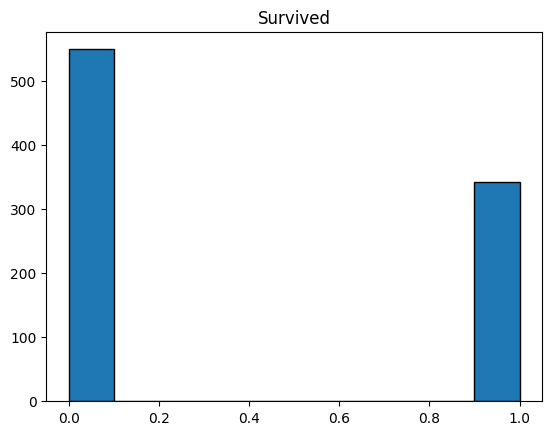

In [ ]:
plt.hist(df.Survived,ec='black')
plt.title('Survived')

As we have categorical value here either 0 or 1. So we will use median here to fill NaN

Text(0.5, 1.0, 'After Filling NaN in Survived')

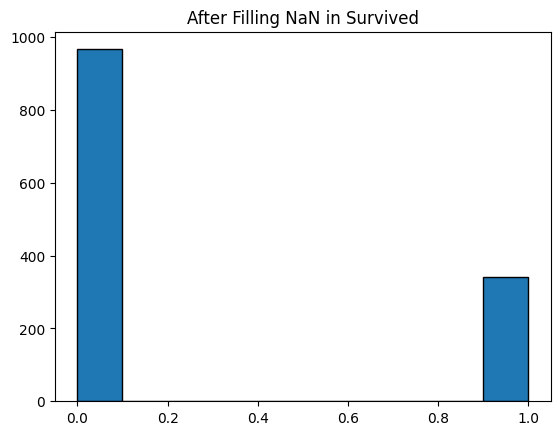

In [ ]:
df.Survived.fillna(df.Survived.median(),inplace=True)
plt.hist(df.Survived,ec='black')
plt.title("After Filling NaN in Survived")

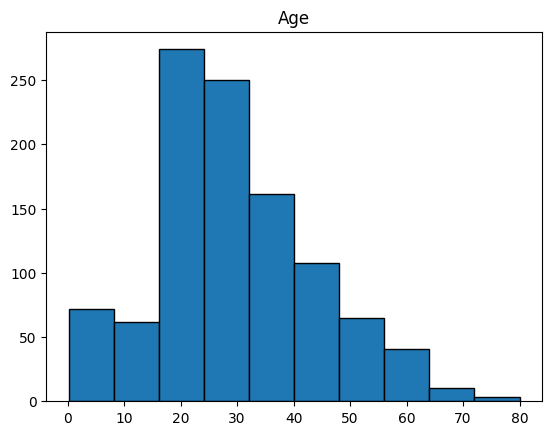

In [ ]:
age = df.Age
plt.hist(age,ec='black')
plt.title('Age')
plt.show()

As data is right skewed so we will use median to handle missing values.

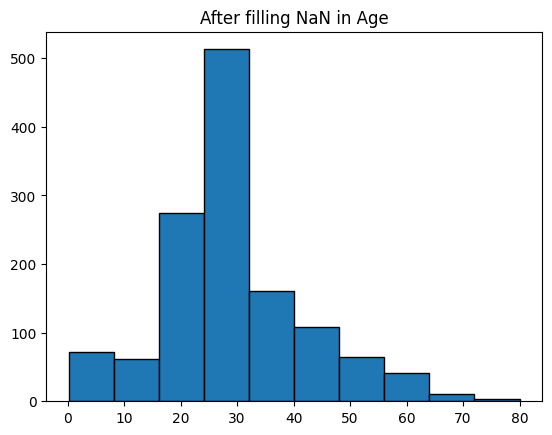

Number of null values in Age:  0


In [ ]:
age.fillna(age.median(),inplace=True)
df.Age=age
plt.hist(df.Age,ec='black')
plt.title('After filling NaN in Age')
plt.show()
print("Number of null values in Age: ", age.isna().sum())

In [ ]:
df.Cabin.fillna(df.Cabin.mode(), inplace=True)

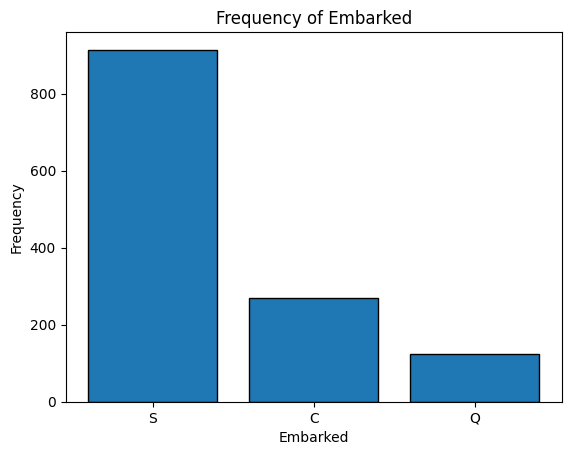

In [ ]:
#As Embarked is categorical attribute so we will handle null values with mode
df.Embarked.fillna(df.Embarked.mode(), inplace=True)
embarked_counts = df['Embarked'].value_counts()

plt.bar(embarked_counts.index, embarked_counts, ec='black')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.title('Frequency of Embarked')
plt.show()

**Handling Outliers**

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,

       df.mean(),

       np.where(

           df < lower,

           df.mean(),

           df

           )

       )


   return pd.Series(df)


def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [ ]:
for col in df.columns:
  temp = df[col]
  if temp.dtype == 'float64' or temp.dtype == 'int':
    outliers=find_outliers_IQR(temp)
    print('Number of outliers in '+ col + ": ", len(outliers))

Number of outliers in PassengerId:  0
Number of outliers in Survived:  0
Number of outliers in Pclass:  0
Number of outliers in Age:  101
Number of outliers in SibSp:  57
Number of outliers in Parch:  307
Number of outliers in Fare:  171


In [ ]:
outliers = find_outliers_IQR(df.Age)
while (len(outliers))!=0:
 df.Age = impute_outliers_IQR(df.Age)
 outliers = find_outliers_IQR(df.Age)

outliers = find_outliers_IQR(df.SibSp)
while (len(outliers))!=0:
 df.SibSp = impute_outliers_IQR(df.SibSp)
 outliers = find_outliers_IQR(df.SibSp)

outliers = find_outliers_IQR(df.Parch)
while (len(outliers))!=0:
 df.Parch = impute_outliers_IQR(df.Parch)
 outliers = find_outliers_IQR(df.Parch)

outliers = find_outliers_IQR(df.Fare)
while (len(outliers))!=0:
 df.Fare = impute_outliers_IQR(df.Fare)
 outliers = find_outliers_IQR(df.Fare)

In [ ]:
#After removing outliers
for col in df.columns:
  temp = df[col]
  if temp.dtype == 'float64' or temp.dtype == 'int':
    outliers=find_outliers_IQR(temp)
    print('Number of outliers in '+ col + ": ", len(outliers))

Number of outliers in PassengerId:  0
Number of outliers in Survived:  0
Number of outliers in Pclass:  0
Number of outliers in Age:  0
Number of outliers in SibSp:  0
Number of outliers in Parch:  0
Number of outliers in Fare:  0


**Normalize numercial features**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
for col in df.columns:
  temp = df[col]
  if temp.dtype == 'float64' or temp.dtype == 'int':
    df[col]= scaler.fit_transform(np.array(temp).reshape(-1, 1))

**Encoding Categorical Variables**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
for col in df.columns:
    if df[col].dtype == 'object': #here we are checking if attribute is catgeorical by checking it is equal to object or not.
        df[col] = onehot_encoder.fit_transform(df[[col]])

In [ ]:
df.Embarked

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1304    0.0
1305    1.0
1306    0.0
1307    0.0
1308    1.0
Name: Embarked, Length: 1309, dtype: float64

In [ ]:
df.Sex

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    0.0
1305    1.0
1306    0.0
1307    0.0
1308    0.0
Name: Sex, Length: 1309, dtype: float64